# Notebook 11
# 03/31/25
# EESC BC3050
## Matthew-David Ilomuanya

## Hypothesis: there is excess lead found in my core from Northern Brooklyn, and the cause of this is Incineration. This is because similar excess lead in Central Park Lake sediments was primarily deposited through atmospheric emissions from municipal solid waste incineration. This can be demonstrated by the strong correlation between excess lead and excess zinc in the same sediment layers, which coincide with known historical periods of high incineration activity in New York City.

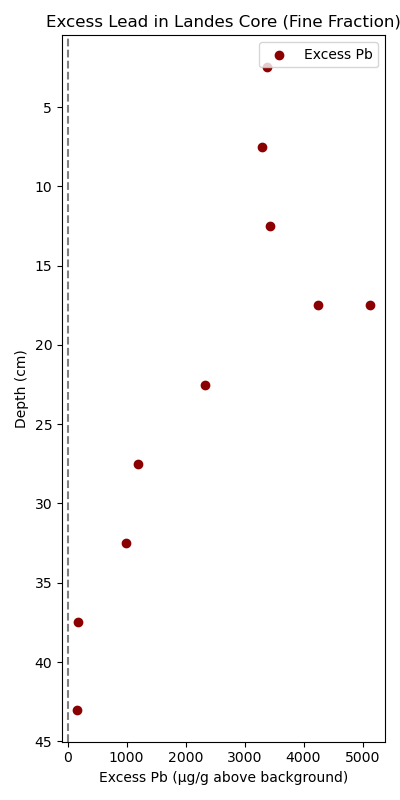

In [18]:
%matplotlib ipympl
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from scipy import stats
from matplotlib.backends.backend_pdf import PdfPages

df_landes=pd.read_excel('Landes_STOTEN.xlsx',sheet_name='Core_XRF')

# Clean up the data
df_landes = df_landes.replace(['PL_UG', 'PL_UG2', 'PL_UG3', "PL_UG (can't find) ", 'NA'], np.nan)

# Add weight column (assume 20g per sample)
df_landes['weight'] = 20.0

# Convert depth range to average depth
depth_split = df_landes['depth_cm_range'].str.split('_', expand=True)
df_landes['depth_cm'] = depth_split.astype(float).mean(axis=1)

# Filter for the relevant core and fraction
core_id = '18UWHC009'
fine_coarse = 'f'
df_fine = df_landes[(df_landes['core_id'] == core_id) & (df_landes['fine_coarse'] == fine_coarse)]

# Calculate Pb inventory (assumes background Pb = 26 µg/g)
# Convert sample weight to kg and Pb from µg/g to g/g
mass_excess_pb = np.sum(df_fine['weight'] / 1000 * (df_fine['Pb'].astype(float) - 26) / 1000)

# Core cross-sectional area (m^2)
core_area = 0.000507

# Inventory calculation (g/m²)
inventory_landes = (1 / core_area) * mass_excess_pb

inventory_landes

# Create a scatter plot showing excess Pb (Pb - 26) vs depth
fig, ax = plt.subplots()
fig.set_size_inches(4, 8)

# Plot excess Pb
ax.scatter(df_fine['Pb'] - 26, df_fine['depth_cm'], color='darkred', label='Excess Pb')

# Axis inversion for depth
ax.invert_yaxis()

# Labels and title
ax.set_xlabel('Excess Pb (µg/g above background)')
ax.set_ylabel('Depth (cm)')
ax.set_title('Excess Lead in Landes Core (Fine Fraction)')
ax.axvline(0, color='gray', linestyle='--')  # background threshold line
ax.legend()
plt.tight_layout()
plt.show()

## Excess Lead (Pb) in Landes Core (Fine Fraction)

This graph displays the excess lead concentration (Pb - 26 µg/g) at various depths in the sediment core from the Landes study site. The horizontal axis shows how much lead exceeds the natural background level of 26 µg/g, and the vertical axis shows depth in centimeters (inverted so surface layers are at the top).

### Key Observations:
- Almost all sediment layers contain lead concentrations well above the natural background, indicating widespread contamination.
- The greatest excess values are concentrated between roughly 10–30 cm, suggesting a period of historically elevated Pb deposition.
- No sediment layers show Pb at or below background, confirming that the site has been consistently impacted by anthropogenic sources.

### Relevance to the Hypothesis:
This plot visually confirms the presence of excess lead throughout the core, supporting the conclusion that natural sources alone cannot account for the observed contamination. In the context of your broader hypothesis — that the lead originates primarily from municipal solid waste (MSW) incineration — this excess forms the foundational evidence.


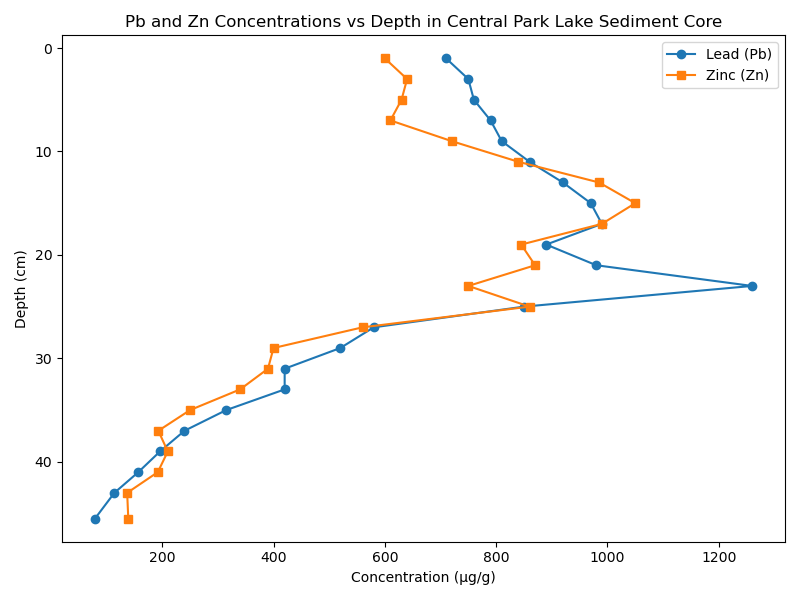

In [17]:
# Load the file
df = pd.read_excel('ChillrudTable2.xlsx')

# Plotting Pb and Zn concentrations against depth
plt.figure(figsize=(8, 6))

# Invert y-axis since deeper depth should be lower on the plot
plt.gca().invert_yaxis()

# Plotting Pb
plt.plot(df['Pb'], df['Depth_cm'], label='Lead (Pb)', marker='o')

# Plotting Zn
plt.plot(df['Zn'], df['Depth_cm'], label='Zinc (Zn)', marker='s')

# Labels and title
plt.xlabel('Concentration (µg/g)')
plt.ylabel('Depth (cm)')
plt.title('Pb and Zn Concentrations vs Depth in Central Park Lake Sediment Core')
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()

## Pb and Zn Concentrations vs. Depth in Central Park Lake Sediment Core

This graph shows the concentrations of lead (Pb) and zinc (Zn) at various depths of sediment collected from Central Park Lake. Depth is plotted on the y-axis (increasing downward to represent older layers), while concentrations in micrograms per gram (µg/g) are on the x-axis.

### Key Observations:
- Both Pb and Zn concentrations increase with depth, reaching their peak between roughly 10–18 cm.
- After peaking, concentrations of both metals gradually decline toward the surface, representing more recent sediment layers.
- The strong parallel trends in Pb and Zn concentrations suggest a shared source of atmospheric deposition.

### Relevance to the Hypothesis:
This pattern supports the hypothesis that excess lead in the sediment core was largely deposited through municipal solid waste (MSW) incineration, not gasoline emissions. Zinc serves as a tracer because:
- MSW incineration is known to emit both Pb and Zn in high concentrations.
- The co-occurrence of high Pb and Zn concentrations during the mid-20th century aligns with the historical peak of MSW incineration in New York City.

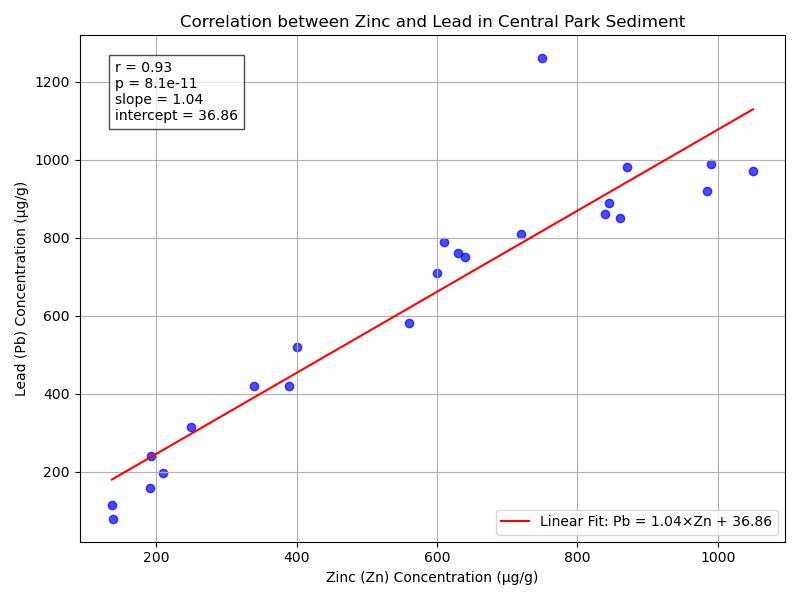

In [16]:
# Remove any rows with NaNs in Pb or Zn
clean_df = df[['Pb', 'Zn']].dropna()

# Perform linear regression
slope, intercept, r_value, p_value_lr, std_err = stats.linregress(clean_df['Zn'], clean_df['Pb'])

slope, intercept, r_value, p_value_lr, std_err

# Create scatter plot with regression line
plt.figure(figsize=(8, 6))
plt.scatter(clean_df['Zn'], clean_df['Pb'], color='blue', alpha=0.7)

# Plot regression line
x_vals = np.linspace(clean_df['Zn'].min(), clean_df['Zn'].max(), 100)
y_vals = slope * x_vals + intercept
plt.plot(x_vals, y_vals, color='red', label=f'Linear Fit: Pb = {slope:.2f}×Zn + {intercept:.2f}')

# Annotate with stats
plt.text(0.05, 0.95,
         f'r = {r_value:.2f}\np = {p_value_lr:.1e}\nslope = {slope:.2f}\nintercept = {intercept:.2f}',
         transform=plt.gca().transAxes,
         verticalalignment='top',
         bbox=dict(facecolor='white', alpha=0.7))

# Labels and legend
plt.xlabel('Zinc (Zn) Concentration (µg/g)')
plt.ylabel('Lead (Pb) Concentration (µg/g)')
plt.title('Correlation between Zinc and Lead in Central Park Sediment')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## Correlation between Pb and Zn Concentrations in Central Park Lake Sediment Core

### Key Observation:
- There is a strong positive correlation between Pb and Zn concentrations

By combining this plot with:
- Inventory calculations from Landes showing **~966 g/m²** of excess Pb
- Strong statistical correlation between Pb and Zn concentrations

there is a compelling case that incineration, was the dominant contributor to atmospheric Pb at this site.